In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [40]:
data=pd.read_csv('Delay.csv')
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003,1955,2211,2225,WN,335,...,4,8,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754,735,1002,1000,WN,3231,...,5,10,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628,620,804,750,WN,448,...,3,17,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829,1755,1959,1925,WN,3920,...,3,10,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940,1915,2121,2110,WN,378,...,4,10,0,N,0,NaN,NaN,NaN,NaN,NaN


In [41]:
data['ArrDelay'].isnull().sum()

0

In [42]:
data['ArrDelay']=data['ArrDelay'].fillna(data['ArrDelay'].mean())

In [43]:
data['ArrDelay'].isnull().sum()

0

In [44]:
data['DepDelay'].isnull().sum()

0

Now we dont have any null values in columns 'ArrDelay' and 'DepDelay'>>> Lets go ahead and apply Linear Regression

In [45]:
x = data['ArrDelay']
y = data['DepDelay']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/4,random_state=0)
##Deviding the data into training and test data.

In [47]:
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)
# Linear regression works on 2D array. Either we need to convert out input into 2D arrays or reshape data into (-1,1)

In [48]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y_predict = reg.predict(x_test)

In [37]:
reg.coef_

array([0.89402009])

In [50]:
reg.intercept_

10.421866367891596

Text(0.5, 1.0, 'Flight Delay for Training Data')

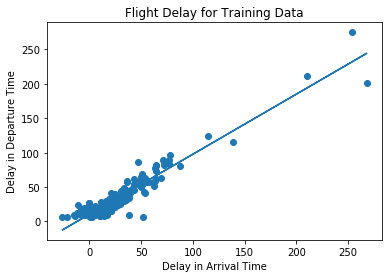

In [51]:
#Visualise using matplot Lib for Training Data
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train))
plt.xlabel('Delay in Arrival Time')
plt.ylabel('Delay in Departure Time')
plt.title("Flight Delay for Training Data")

Text(0.5, 1.0, 'Flight Delay for Test Data')

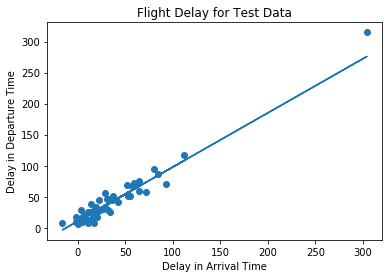

In [52]:
#Visualisation for Test data
plt.scatter(x_test,y_test)
plt.plot(x_test,reg.predict(x_test))
plt.xlabel('Delay in Arrival Time')
plt.ylabel('Delay in Departure Time')
plt.title("Flight Delay for Test Data")